In [1]:
! pip install tensorflow

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

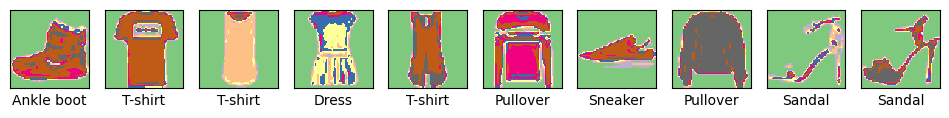

In [45]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

# Visualize a few images from the training dataset
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap='Accent')
    plt.xlabel(class_names[trainY[i]])
plt.show()


# Normalize the pixel values (0 to 1 range)

In [47]:
trainX = trainX / 255.0
testX = testX / 255.0

# One-hot encode

In [48]:
trainY = tf.keras.utils.to_categorical(trainY, 10)
testY = tf.keras.utils.to_categorical(testY, 10)

In [49]:
trainX.shape

(60000, 28, 28)

In [51]:
testX.shape

(10000, 28, 28)

In [55]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
784 * 512 + 512  , 512 * 256 + 256, 256 * 10 + 10

(401920, 131328, 2570)

In [67]:
401920 + 131328 + 2570

535818

In [69]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [75]:
history = model.fit(trainX, trainY,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9191 - loss: 0.2047 - val_accuracy: 0.9166 - val_loss: 0.2138
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9245 - loss: 0.1994 - val_accuracy: 0.9097 - val_loss: 0.2341
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9276 - loss: 0.1902 - val_accuracy: 0.9133 - val_loss: 0.2331
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9300 - loss: 0.1843 - val_accuracy: 0.9126 - val_loss: 0.2563
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9324 - loss: 0.1757 - val_accuracy: 0.9146 - val_loss: 0.2278
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9355 - loss: 0.1682 - val_accuracy: 0.9091 - val_loss: 0.2420
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9368 - loss: 0.1626 - val_accuracy: 0.9077 - val_loss: 0.2701
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9402 - loss: 0

In [76]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(testX, testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8921 - loss: 0.3987


In [77]:
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 89.26%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


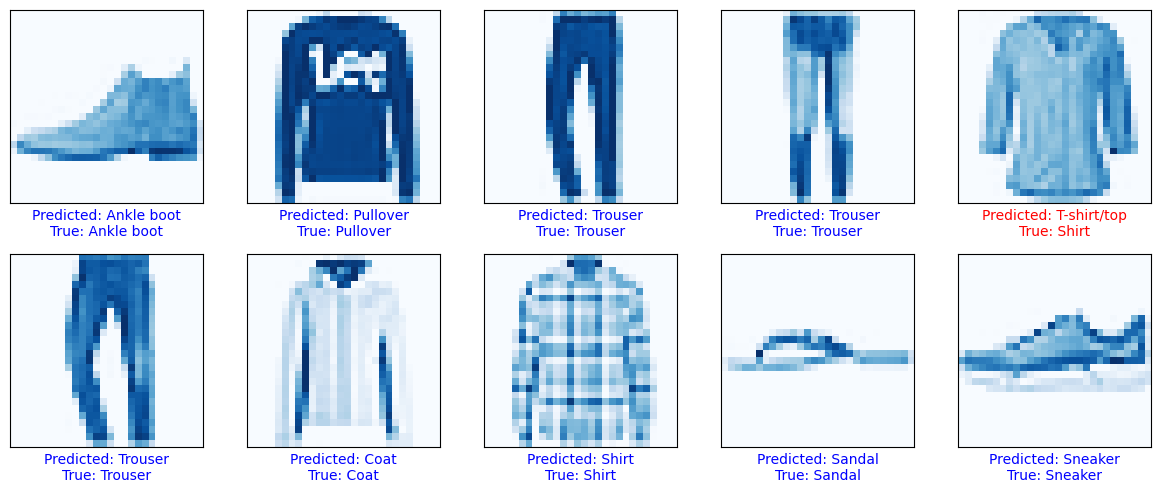

In [79]:
predictions = model.predict(testX)

# Convert one-hot encoded predictions and true labels back to single integers
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Class names (same as before)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot 10 test images, and show their predicted vs true labels
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testX[i], cmap='Blues')
    predicted_label = class_names[predicted_labels[i]]
    true_label = class_names[true_labels[i]]

    # Set color to green if correct prediction, else red
    color = 'blue' if predicted_label == true_label else 'red'

    # Display the predicted and true labels
    plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)
plt.tight_layout()
plt.show()


In [80]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [83]:
history = model.fit(trainX, trainY,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7748 - loss: 0.6322 - val_accuracy: 0.8617 - val_loss: 0.3903
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8600 - loss: 0.3847 - val_accuracy: 0.8604 - val_loss: 0.3761
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8726 - loss: 0.3378 - val_accuracy: 0.8752 - val_loss: 0.3417
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8842 - loss: 0.3141 - val_accuracy: 0.8842 - val_loss: 0.3228
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8920 - loss: 0.2877 - val_accuracy: 0.8832 - val_loss: 0.3273
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8944 - loss: 0.2809 - val_accuracy: 0.8802 - val_loss: 0.3395
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9021 - loss: 0.2661 - val_accuracy: 0.8844 - val_loss: 0.3285
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9027 - loss: 0

In [84]:
test_loss, test_acc = model.evaluate(testX, testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8746 - loss: 0.3624


In [85]:
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 87.66%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


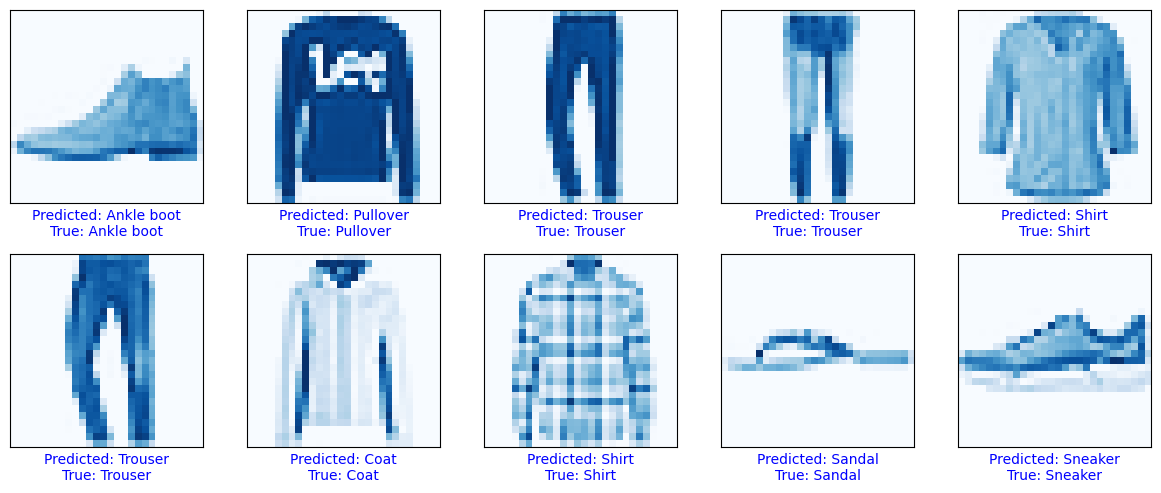

In [86]:
predictions = model.predict(testX)

# Convert one-hot encoded predictions and true labels back to single integers
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testY, axis=1)

# Class names (same as before)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot 10 test images, and show their predicted vs true labels
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testX[i], cmap='Blues')
    predicted_label = class_names[predicted_labels[i]]
    true_label = class_names[true_labels[i]]

    # Set color to green if correct prediction, else red
    color = 'blue' if predicted_label == true_label else 'red'

    # Display the predicted and true labels
    plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)
plt.tight_layout()
plt.show()